# Installing Dependencies

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install scipy
%pip install seaborn

# Ex 1. 
ANOVA is a statistical test that can be used to assess the discriminative power of a \
single input variable. Using `f_classif` from `sklearn`, identify the input variables with the \
worst and best discriminative power. Plot their class-conditional probability density \
functions.


    Input var. with lowest discriminative power: BloodPressure
    Input var. with highest discriminative power: Glucose



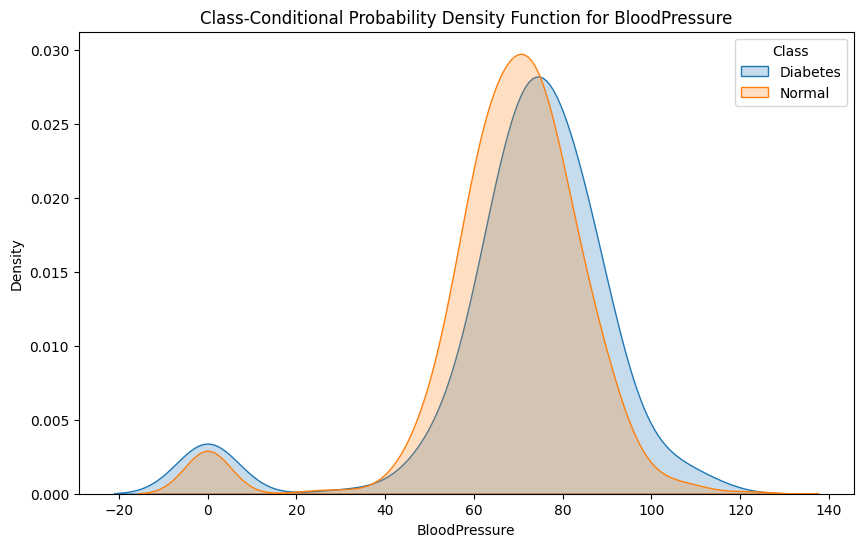

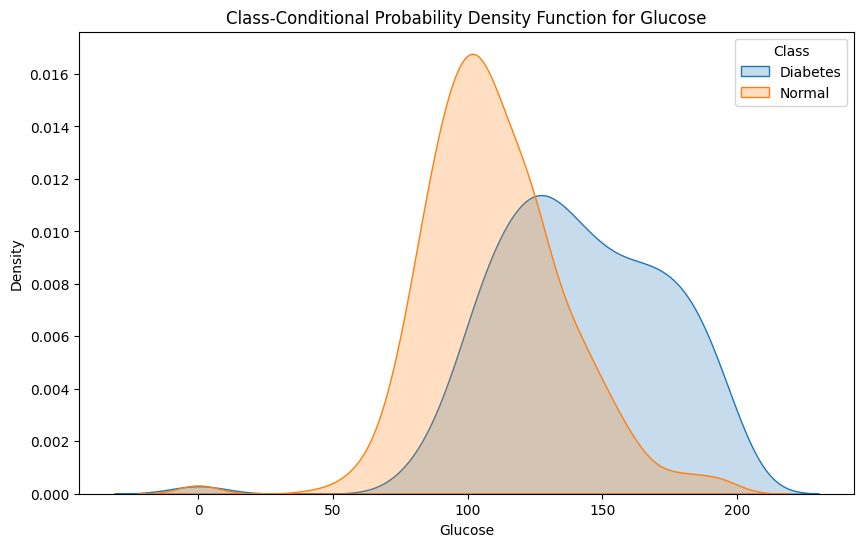

In [72]:
# Importing modules
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
from seaborn import kdeplot
import matplotlib.pyplot as plt
import pandas as pd


# Create dataframe from .arff database
df = pd.DataFrame(loadarff('./diabetes.arff')[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')

# Replace class names from '0' | '1' -> 'Normal' | 'Diabetes'
df['Outcome'] = df['Outcome'].replace({'0': 'Normal', '1': 'Diabetes'})

# Compute variables with lowest/highest discriminative power
x = df.drop('Outcome', axis=1) # Everything but the outcome column
y_out = df['Outcome'] # Outcome column

anova_f_value = f_classif(x, y_out)[0] # Get the f-value only

lowest_power_var = x.columns[anova_f_value.argmin()]
highest_power_var = x.columns[anova_f_value.argmax()]

print(f'''
    Input var. with lowest discriminative power: {lowest_power_var}
    Input var. with highest discriminative power: {highest_power_var}
''')

# Plotting the class-conditional probability density functions
unique_outcomes = df['Outcome'].unique()

outcome_subsets = [(df[df['Outcome'] == outcome], outcome) for outcome in unique_outcomes]

# Input var. with lowest discriminative power
plt.figure(figsize=(10, 6))
for subset, outcome_class in outcome_subsets:
    kdeplot(subset[lowest_power_var], label=outcome_class, fill=True) # PDF plot
plt.xlabel(lowest_power_var)
plt.ylabel('Density')
plt.legend(title='Class')
plt.title(f'Class-Conditional Probability Density Function for {lowest_power_var}')
plt.show()

# Input var. with highest discriminative power
plt.figure(figsize=(10, 6))
for subset, outcome_class in outcome_subsets:
    kdeplot(subset[highest_power_var], label=outcome_class, fill=True) # PDF plot
plt.xlabel(highest_power_var)
plt.ylabel('Density')
plt.legend(title='Class')
plt.title(f'Class-Conditional Probability Density Function for {highest_power_var}')
plt.show()

# Ex 2. 
Using a stratified 80-20 training-testing split with a fixed seed `(random_state=1)`, assess \
in a single plot both the training and testing accuracies of a decision tree with minimum \
sample split in $\{2,5,10,20,30,50,100\}$ and the remaining parameters as default. \
\
[optional] Note that split thresholding of numeric variables in decision trees is non- \
deterministic in sklearn, hence you may opt to average the results using 10 runs per \
parameterization.

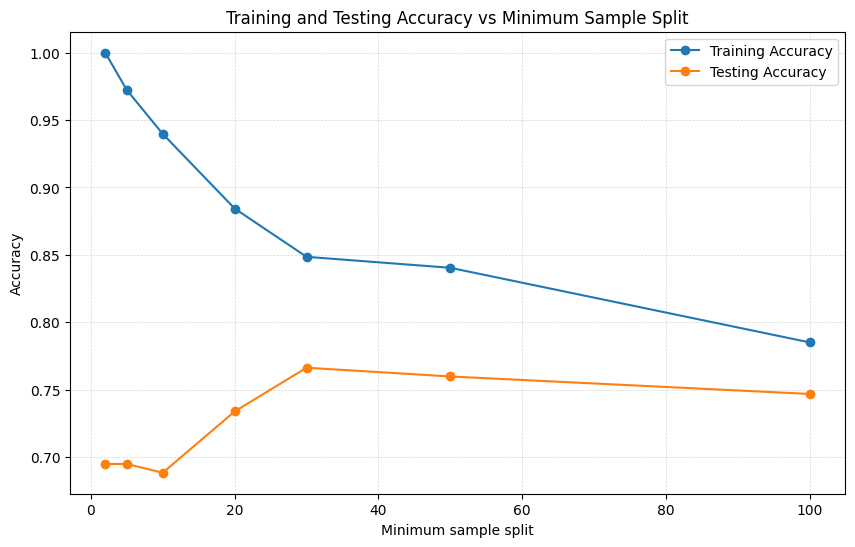

In [73]:
# Importing modules
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Create dataframe from .arff database
df = pd.DataFrame(loadarff('./diabetes.arff')[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')

x = df.drop('Outcome', axis=1) # Everything but the outcome column
y_out = df['Outcome'] # Outcome column


# Splitting dataset into a 80-20 training set
x_train, x_test, y_out_train, y_out_test = train_test_split(x, y_out, train_size=.8, random_state=1, stratify=y_out)

# Minimum sample split values
min_sample_splits = [2, 5, 10, 20, 30, 50, 100]

train_accuracies = [] 
test_accuracies = []

for min_split in min_sample_splits:
    # Create classifier and learn from it
    clf = DecisionTreeClassifier(min_samples_split=min_split, random_state=1)
    clf.fit(x_train, y_out_train)

    # Calculate training accuracy
    train_accuracies.append(accuracy_score(y_out_train, clf.predict(x_train))) # Compare prediction with actual value

    # Calculate testing accuracy
    test_accuracies.append(accuracy_score(y_out_test, clf.predict(x_test)))

# Plot the figure
plt.figure(figsize=(10, 6))
plt.plot(min_sample_splits, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_sample_splits, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Minimum sample split')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Training and Testing Accuracy vs Minimum Sample Split')
plt.show()

# Ex 3.
Critically analyze these results, including the generalization capacity across settings. (**Refer to the report for this question**)

# Ex 4.
To deploy the predictor, a healthcare provider opted to learn a single decision tree \
`(random_state=1)` using all available data and ensuring that the maximum depth would be 3 \
in order to avoid overfitting risks. \
i). Plot the decision tree. \
ii). Explain what characterizes diabetes by identifying the conditional associations 
together with their posterior probabilities (**Refer to the report for this question**)

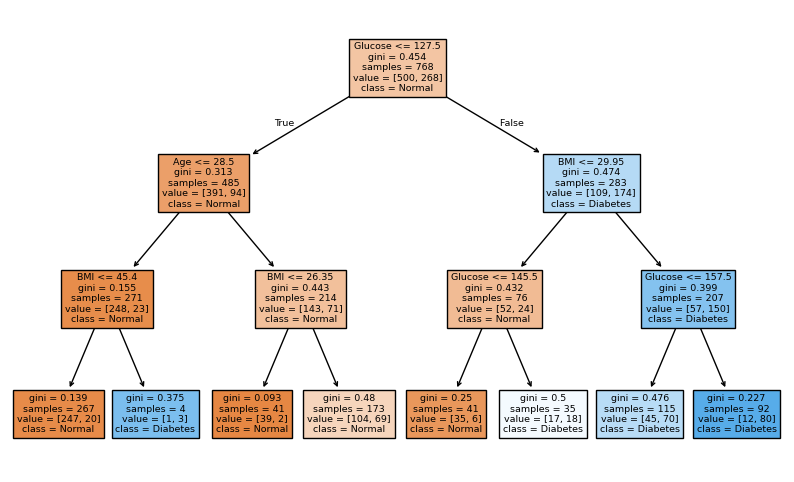

In [74]:
# 4.i

# Importing modules
from scipy.io.arff import loadarff
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create dataframe from .arff database
df = pd.DataFrame(loadarff('./diabetes.arff')[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')

# Separate features (X) and target variable (y)
x = df.drop('Outcome', axis=1)
y_out = df['Outcome']

# Create and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=1, max_depth=3)
clf.fit(x, y_out)

# Plot the decision tree
plt.figure(figsize=(10, 6))
# 0 -> Negative | 1 -> Positive
plot_tree(clf, feature_names=x.columns, class_names=['Normal', 'Diabetes'], filled=True)
plt.show()

# Calculate posterior probabilities
probabilities = clf.predict_proba(x)
leaf_nodes = clf.apply(x)
unique_leaves = np.unique(leaf_nodes)

# Get the decision path for each sample
path = clf.decision_path(x)
